# Import thư viện và lấy ra dữ liệu

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data/Final_data.csv")

# Thông tin cơ bản

In [3]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8151274 entries, 0 to 8151273
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   Gia_mo         float64       
 2   Gia_max        float64       
 3   Gia_min        float64       
 4   Gia_dong       float64       
 5   Khoi_Luong_GD  int64         
 6   Ma_CP          object        
 7   Ten_CT         object        
 8   Nganh_Hang     object        
 9   Von_Hoa_TT     object        
 10  Xep_Hang       int64         
 11  Quoc_Gia       object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 746.3+ MB


In [ ]:
df.describe()

,Gia_mo,Gia_max,Gia_min,Gia_dong,Khoi_Luong_GD,Xep_Hang
count,8.151274e+06,8.151274e+06,8.151274e+06,8.151274e+06,8.151274e+06,8.151274e+06
mean,4.938917e+01,5.008512e+01,4.867975e+01,4.938681e+01,1.642436e+06,4.019609e+03
std,1.296880e+02,1.313573e+02,1.279735e+02,1.296851e+02,7.231031e+06,2.387418e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.890000e+00,9.090000e+00,8.660000e+00,8.870000e+00,9.978500e+04,1.896000e+03
50%,2.374000e+01,2.415000e+01,2.330740e+01,2.373000e+01,3.729020e+05,4.193000e+03
75%,5.335000e+01,5.408000e+01,5.260000e+01,5.335000e+01,1.212898e+06,6.140000e+03
max,7.028500e+03,7.075000e+03,6.997910e+03,7.024820e+03,2.956071e+09,7.949000e+03


Ta thấy dữ liệu có 8151274 bản ghi khác nhau, với đa phần các giá trị thấp nhất đều bắt đầu từ 0, trung bình giá mở cửa sẽ là 49.38, giá đóng sẽ là 49.86, và klgd là 1642436 (ta sẽ tập trung chủ yếu vào 3 giá trị này), giá trị lớn nhất là 7028.5 cho giá mở,  7024.82 cho giá đóng và 2.95x10^9 cho klgd, ta thấy nó chênh lệch khá nhiều so với giá trị trung bình và cả giá trị min của tập => lượng cổ phiếu có giá thấp và lượng giao dịch thấp chiếm đa số trong tập dữ liệu

Rõ hơn nữa, nhìn vào phân vị 75 của 2 giá trị giá đóng và mở đều khá thấp, chỉ có 53.35 nên cho thấy điều này tương đối chính xác

In [ ]:
len(df["Ma_CP"].unique())

4235

Có 4235 mã CP khác nhau nhưng xếp hạng thấp nhất là 7949 => Không có sự liên tục của xếp hạng trong tập dữ liệu, tức một vài vị trí xếp hạng không có trong tập dữ liệu

In [ ]:
len(df["Nganh_Hang"].unique())

147

In [ ]:
len(df["Quoc_Gia"].unique())

54

In [ ]:
len(df["Date"].unique())

2516

Dữ liệu được lấy từ 147 ngành hàng khác nhau, 54 quốc gia và trong vòng tổng cộng 2516 ngày giao dịch

# Visualization

Bây giờ ta sẽ xem thử qua một vài điều có thể suy điễn được từ biểu đồ

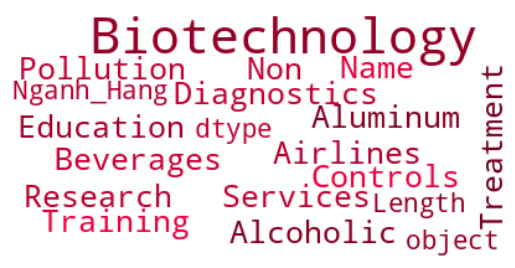

In [34]:
# Ham tao mau ngau nhien
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


temp = df[["Ma_CP", "Nganh_Hang"]]
temp = temp.drop_duplicates(["Ma_CP"], keep='last') # Lay ra mot df voi danh sach cac cong ty va nganh tuong ung

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(temp["Nganh_Hang"]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

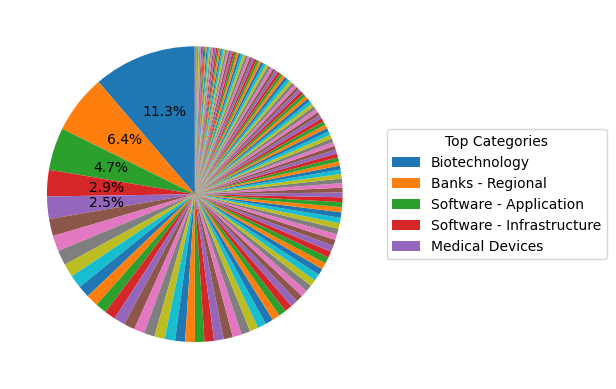

In [63]:
data = temp["Nganh_Hang"].value_counts()
sorted_indices = sorted(range(len(data.values)), key=lambda k: data.values[k], reverse=True)
sorted_labels = [data.index[i] for i in sorted_indices]
sorted_sizes = [data.values[i] for i in sorted_indices]

fig, ax = plt.subplots()

patches, texts, autotexts = ax.pie(data.values, autopct='%1.1f%%', startangle=90)

# Remove labels from the existing pie chart
for text in texts + autotexts:
  if text in autotexts:
    if float(text.get_text()[:-1]) < 2.0:
      text.set_visible(False)

N = 5  # Number of top elements for the legend
legend_labels = sorted_labels[:N]
ax.legend(legend_labels, title="Top Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Ta có thể thấy, ngành công nghệ sinh học chiếm một lượng lớn trong số các công ty có trong tập dữ liệu, tiếp theo sau đó là ngân hàng, phần mềm, phần cứng và thiết bị y tế, còn các ngành khác tương đối đồng đều với nhau và không đáng kể cho lắm

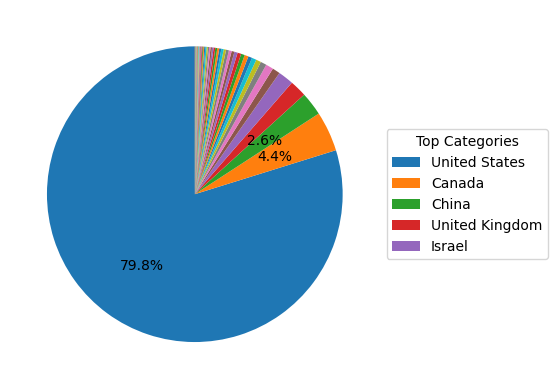

In [64]:
temp = df[["Ma_CP", "Quoc_Gia"]]
temp = temp.drop_duplicates(["Ma_CP"], keep='last') # Lay ra mot df voi danh sach cac cong ty va quoc gia tuong ung

data = temp["Quoc_Gia"].value_counts()
sorted_indices = sorted(range(len(data.values)), key=lambda k: data.values[k], reverse=True)
sorted_labels = [data.index[i] for i in sorted_indices]
sorted_sizes = [data.values[i] for i in sorted_indices]

fig, ax = plt.subplots()

patches, texts, autotexts = ax.pie(data.values, autopct='%1.1f%%', startangle=90)

# Remove labels from the existing pie chart
for text in texts + autotexts:
  if text in autotexts:
    if float(text.get_text()[:-1]) < 2.0:
      text.set_visible(False)

N = 5  # Number of top elements for the legend
legend_labels = sorted_labels[:N]
ax.legend(legend_labels, title="Top Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

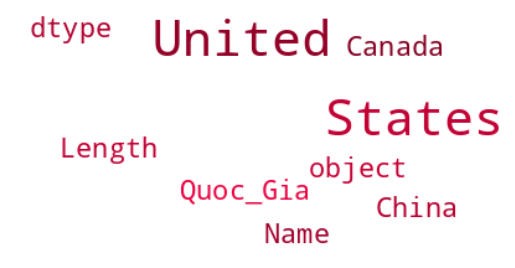

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(temp["Quoc_Gia"]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

Quá rõ ràng, phần lớn các mã cổ phiếu đều đến từ thị trường Mỹ, rồi Canada và China cũng chiếm kha khá còn các nước khác thì chỉ chiếm một phần rất nhỏ trong tập dữ liệu

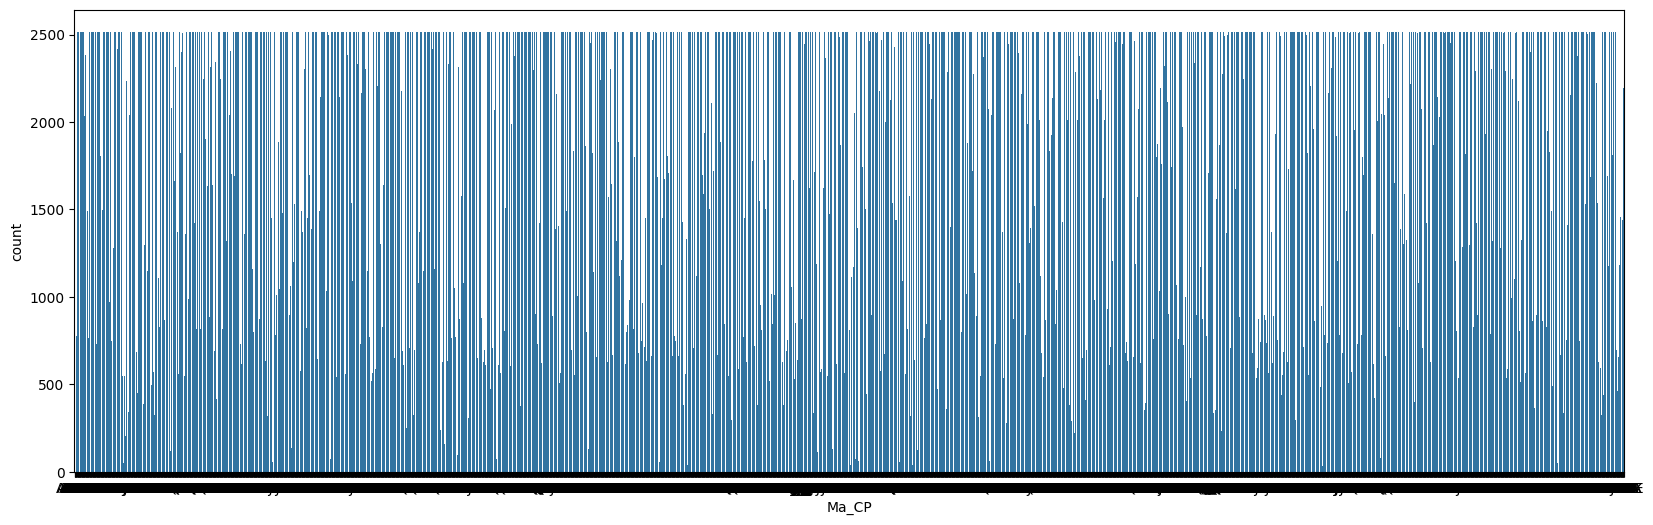

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Ma_CP') # Bieu do xem moi ma se co bao nhieu ngay
plt.show()

Ta thấy, tiu trong cùng khoảng thời gian nhưng các mã CP lại không có số lần xuất hiện như nhau, điều này có thể do một số công ty đã mở từ lâu, còn một số công ty thì mới mở hoặc mới lên sàn thời gian gần đây

Gia_mo
Gia_max
Gia_min
Gia_dong


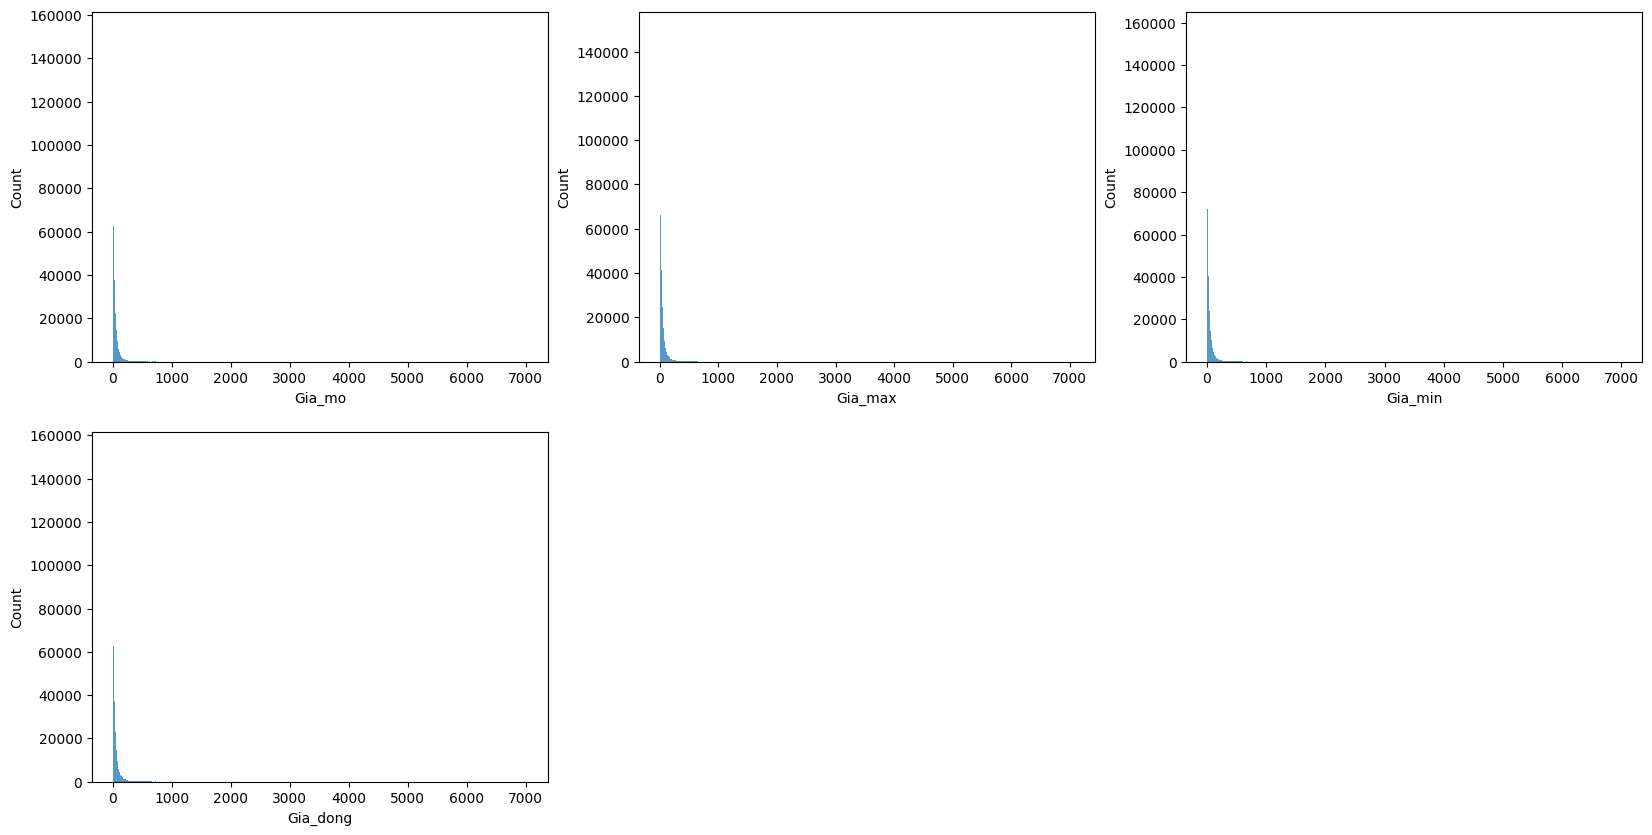

In [ ]:
plt.figure(figsize=(20, 10))

cols = ["Gia_mo",	"Gia_max",	"Gia_min",	"Gia_dong"] # Lay ra cac cot quan trong

for i, col in enumerate(cols):
  print(col)
  plt.subplot(2, 3, i + 1)
  sns.histplot(data=df, x=col) # Ve bieu do tan so cho tung cot

plt.show()

ta thấy rõ ràng nhận định ban đầu của ta là đúng, khi mà biểu đồ bị giá bị lệch phải rất nặng, chứng tỏ đa phần các cổ phiếu có trong tập dữ liệu đều là các cổ phiếu có giá tương đối thấp

Tiếp theo ta sẽ xem thử một vài tương quan giữa các biến cần quan tâm như giá mở, đóng và klgd

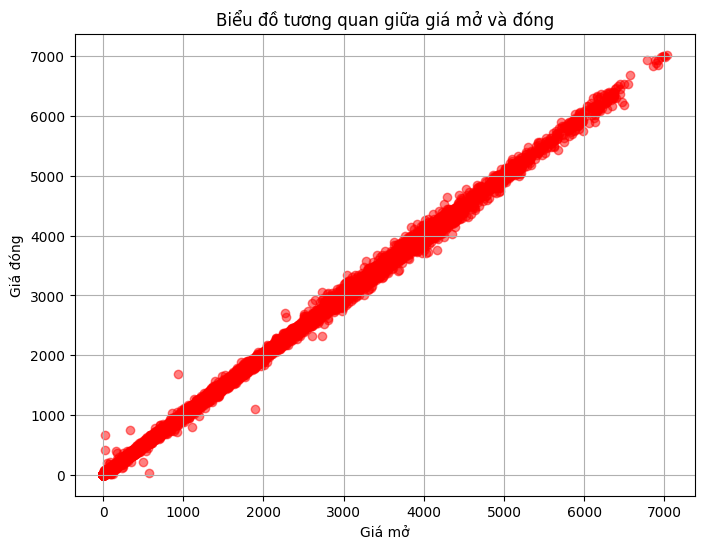

In [ ]:
# Giua gia mo va dong:
plt.figure(figsize=(8,6))
plt.scatter(df["Gia_mo"], df["Gia_dong"], marker = 'o', alpha = 0.5, c='r')
plt.xlabel("Giá mở")
plt.ylabel("Giá đóng")
plt.title("Biểu đồ tương quan giữa giá mở và đóng")
plt.grid()
plt.show()

Ta thấy độ tương quan giữa giá mở và đóng là cực kì cao, chứng tỏ chúng có sự ảnh hưởng đến nhau rất lớn. Giá mở tăng thì giá đóng cũng sẽ tăng, còn giá mở giảm thì giá đóng cũng sẽ giảm.

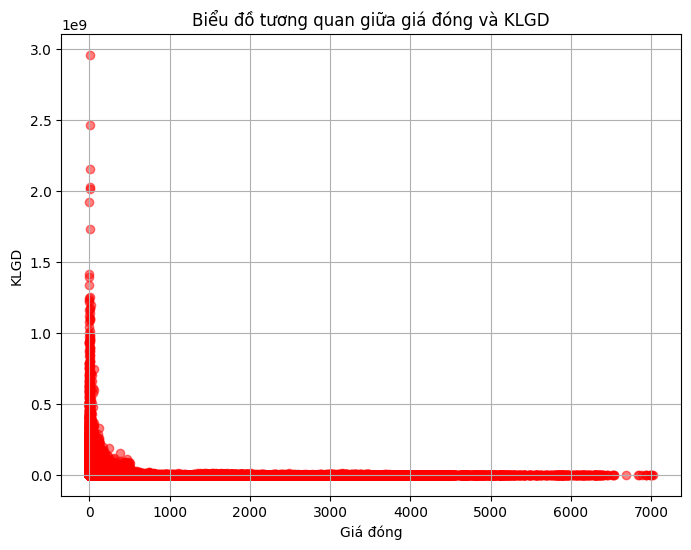

In [ ]:
# Giữa giá đóng và klgd
plt.figure(figsize=(8,6))
plt.scatter(df["Gia_dong"], df["Khoi_Luong_GD"], marker = 'o', alpha = 0.5, c='r')
plt.xlabel("Giá đóng")
plt.ylabel("KLGD")
plt.title("Biểu đồ tương quan giữa giá đóng và KLGD")
plt.grid()
plt.show()

Khá lạ khi mà khối lượng giao dịch cao chưa chắc đã cho ra giá đóng cửa phiên cao, hay khi lượng mua bán không ảnh hưởng nhiều đến giá CP (?)

Kiểm tra tính dừng của một số biến như giá đóng và giá mở cửa

Text(0.5, 1.0, 'Giá đóng')

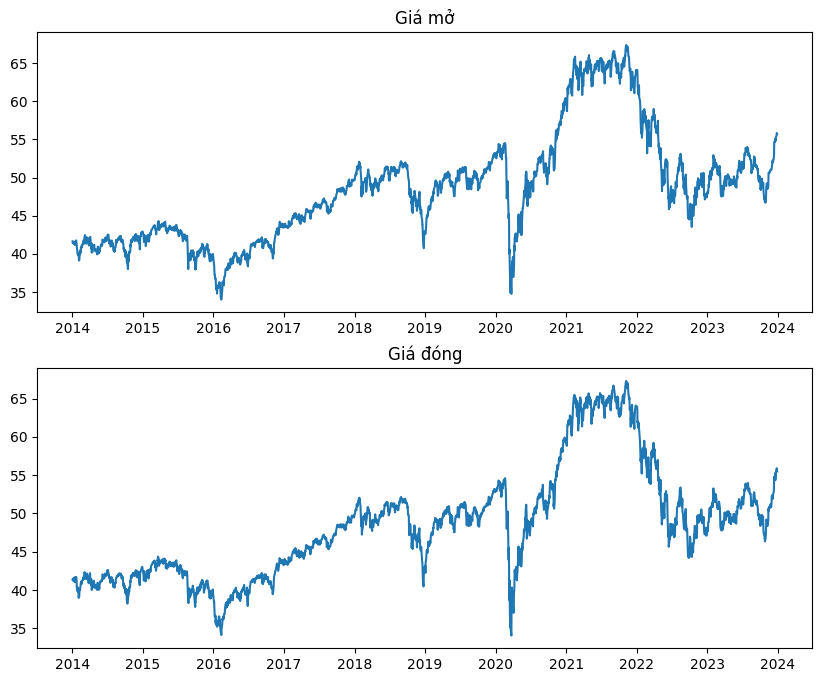

In [ ]:
temp = df[["Date", "Gia_mo", "Gia_dong"]].set_index("Date")  # Lay ra 3 truong gia mo, gia dong va ngay thang
temp = temp.groupby("Date").mean() # Group theo truong ngay thang va lay trung binh cac gia
fig, (ax1, ax2) = plt.subplots(2, figsize = (10,8))
ax1.plot(temp.Gia_mo) # Bieu do cho gia mo
ax1.set_title('Giá mở')
ax2.plot(temp.Gia_dong) # bieu do cho gia dong
ax2.set_title('Giá đóng')

Tính dừng (stationary) là một tính chất tương đối quan trọng đối với các kiểu dữ liệu time-series như dữ liệu về chứng khoán, ở đây một dữ liệu có tính dừng khi trung bình, độ lệch chuẩn và phương sai của chúng không thay đổi theo thời gian.

Ở đây ta thấy, cả hai loại giá đều không có tính dừng mà có xu hướng tăng (tuy không nhiều). Dù vậy, từ năm 2018 trở đi, chúng lại có tính dừng một cách tương đối, chỉ có khoảng năm 2021 đến 2022 là tăng đột biến rồi lại quay lại như trước, gần xấp xỉ tính dừng.

Tuy nhiên ta còn thấy một đặc điểm nữa là hai biểu đồ tương đối giống nhau, chứng tỏ thị trường không biến động quá nhiều, tăng giảm không quá đáng kể.